<a href="https://colab.research.google.com/github/Pradeep1070/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Mnist_handwritten_digit_recorg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Load Data

In [ ]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape
X_train[0].shape

(28, 28)

In [ ]:
xTFlat =  X_train

In [ ]:
X_train[0]

In [ ]:
plt.matshow(X_train[1000])

PreProscess

In [ ]:
#scaling pixel values
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train_flattened = X_train.reshape(len(X_train),28*28) #2ds of a pixel map into 1d so that we can feed it into a single input layer of networks
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
X_test[0]

Model 1

In [ ]:
#sequantial -> layers are to come sequentialy
#dense layer - every input connected to every neuron
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
                 ])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)
#epoch - no of iterations

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4716 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3044 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2840 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2669 - accuracy: 0.9255


Sparse categorical crossentropy vs catergorical crossentropy

 This loss function is commonly employed when dealing with problems where the target variable is categorical (i.e., it takes discrete class labels), and the classes are mutually exclusive.

In the case of sparse categorical crossentropy, the target variable is expected to be provided as integers (class indices), rather than one-hot encoded vectors. This is convenient when dealing with a large number of classes, as it avoids the need to explicitly convert class labels into one-hot encoded vectors.

The mathematical expression for sparse categorical crossentropy is similar to the standard categorical crossentropy, but it simplifies the process of specifying the target labels.

adam is the default choise for optimizers. optimizers optimize back propagation

Adam (Adaptive Moment Estimation):

Advantages: Generally performs well across a wide range of tasks. It adapts the learning rates for each parameter individually.
Usage: A good default choice when you're unsure which optimizer to use.


SGD (Stochastic Gradient Descent):
Advantages: Simple and computationally efficient. Can be effective with proper tuning.
Usage: Suitable for large datasets and simpler models. May require careful tuning of learning rate.


RMSprop (Root Mean Square Propagation):

Advantages: Similar to Adam, adapts learning rates. Can be effective in some cases.
Usage: Experiment when Adam does not perform well, especially in recurrent neural networks.

In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2657 - accuracy: 0.9256


[0.2657184302806854, 0.925599992275238]

In [ ]:
model.predict(X_test_flattened) #predict complete test set. send in a 2d array with one datapoint to predict one datapoint

313/313 [==============================] - 0s 1ms/step


array([[1.2156656e-02, 4.3632025e-07, 7.3772274e-02, ..., 9.9977517e-01,
        8.2661100e-02, 6.7864066e-01],
       [4.2396647e-01, 6.6406475e-03, 9.9924999e-01, ..., 5.2492234e-13,
        1.4324686e-01, 3.9363797e-09],
       [3.0196700e-04, 9.9359727e-01, 6.2443292e-01, ..., 1.3217741e-01,
        3.7675926e-01, 5.5103123e-02],
       ...,
       [1.7588899e-06, 3.5322673e-06, 1.0918494e-03, ..., 1.6706653e-01,
        4.8809776e-01, 7.7745497e-01],
       [7.0032926e-05, 1.5301151e-04, 9.6156960e-05, ..., 2.7832382e-05,
        6.1663532e-01, 1.6064504e-04],
       [3.3871764e-03, 5.2073690e-10, 1.2553401e-01, ..., 5.1576117e-09,
        1.4016060e-04, 1.3610437e-06]], dtype=float32)

In [ ]:
print(model.predict(np.array([X_test_flattened[0]])))

print('\n',type(X_test_flattened[0]))
print(type(np.array([X_test_flattened[0]])))

1/1 [==============================] - 0s 25ms/step
[[1.2156656e-02 4.3632068e-07 7.3772296e-02 9.6438527e-01 3.3925907e-03
  9.7611770e-02 1.6333360e-06 9.9977517e-01 8.2661144e-02 6.7864066e-01]]

 <class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
yPredict = model.predict(X_test_flattened)
yPredict[0]

313/313 [==============================] - 0s 1ms/step


array([1.2156656e-02, 4.3632025e-07, 7.3772274e-02, 9.6438533e-01,
       3.3925890e-03, 9.7611688e-02, 1.6333406e-06, 9.9977517e-01,
       8.2661100e-02, 6.7864066e-01], dtype=float32)

AxesImage(size=(28, 28))
6


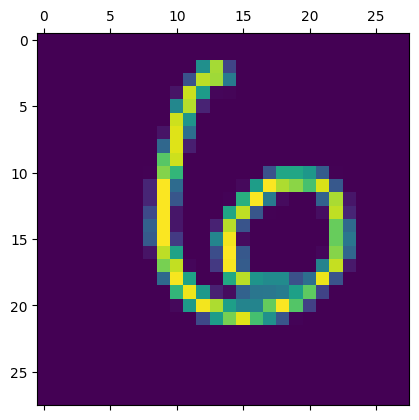

In [ ]:
print(plt.matshow(X_test[100]))
print(np.argmax(yPredict[100]))#get max value

In [ ]:
preds=[np.argmax(i) for i in yPredict]

cm = tf.math.confusion_matrix(labels=y_test, predictions=preds)

Text(33.22222222222222, 0.5, 'Truth')

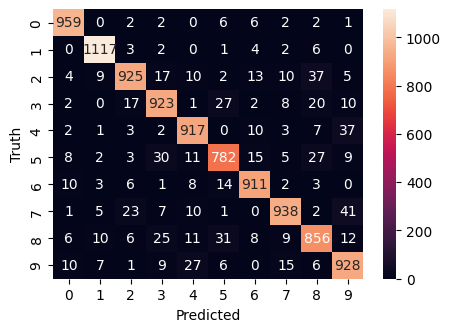

In [ ]:
import seaborn as sn

plt.figure(figsize=(5,3.5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**adding hidden layer**





In [ ]:
len(X_train_flattened)

60000

In [ ]:
model2= keras.Sequential([
    keras.layers.Dense(500,input_shape=(784,),activation='relu'),
    keras.layers.Dense(70,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
# relu is more efficient and helps to mitigate vanishing  gradient problem
# sigmoid, tanh subject to  vanishing gradient
# sigmoid commonly used for the final layer of binary classifiers because it gives a probability for each class

model2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

slice=1
X_train_flattened_sliced=X_train_flattened[:int(len(X_train_flattened)/slice)]
y_train_sliced=y_train[:int(len(y_train)/slice)]

model2.fit(X_train_flattened_sliced,y_train_sliced,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 17s 8ms/step - loss: 0.1944 - accuracy: 0.9424
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0804 - accuracy: 0.9746
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0544 - accuracy: 0.9824
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0403 - accuracy: 0.9869
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0322 - accuracy: 0.9892


In [ ]:
len(X_train_flattened_sliced)

1200

In [ ]:
model2.predict(X_test_flattened)

313/313 [==============================] - 1s 4ms/step


array([[0.39858404, 0.5411606 , 0.55263776, ..., 0.4984232 , 0.5588882 ,
        0.4814396 ],
       [0.42581153, 0.58829147, 0.5946837 , ..., 0.48016503, 0.60915416,
        0.5534137 ],
       [0.45198482, 0.4636748 , 0.44913948, ..., 0.41399628, 0.4870983 ,
        0.41431186],
       ...,
       [0.3608722 , 0.39479464, 0.38418472, ..., 0.50671446, 0.4323675 ,
        0.5450257 ],
       [0.50887203, 0.46383297, 0.5322279 , ..., 0.53083014, 0.6100261 ,
        0.35454378],
       [0.40144044, 0.6019571 , 0.49698728, ..., 0.36891204, 0.58144075,
        0.5785871 ]], dtype=float32)

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (0.2568, 156.359))

0.26 accuracy with a standard deviation of 156.36


In [ ]:
from sklearn.datasets import make_classification

# Create a synthetic dataset (replace this with your own data)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, n_classes=2, random_state=42)


In [ ]:
X

array([[-0.49693203, -0.33912228,  0.22914552, ..., -1.17927302,
         0.45780561,  0.35600629],
       [ 0.01249932,  1.00744397,  0.14009566, ..., -1.76385344,
         0.93791554,  0.45936344],
       [-0.72021202, -1.24448645, -0.47229097, ...,  0.41394755,
        -0.5387903 , -0.26636053],
       ...,
       [ 1.01027459, -0.13092581,  1.18030384, ..., -1.98959095,
        -0.80579965,  0.88702644],
       [-1.20775939, -0.3807634 ,  0.12906749, ..., -0.77725344,
         0.59910333,  0.22671772],
       [ 1.14356604, -0.42459817, -0.31394763, ...,  1.24769039,
        -0.30704834, -0.40246308]])